In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv(
    "../input/world-energy-consumption/World Energy Consumption.csv")

In [3]:
#narrowing down useful varibles
important_vars = ['iso_code', 'country', 'year', 'gdp', 'population','primary_energy_consumption',
                 'coal_consumption', 'gas_consumption', 'oil_consumption', 
                  'fossil_fuel_consumption', 'biofuel_consumption', 
                 'hydro_consumption', 'nuclear_consumption',
                 'solar_consumption', 'wind_consumption','other_renewable_consumption',
                 'renewables_consumption',]

In [4]:
data = df[important_vars]
data = data.dropna()
year_range = data["year"].isin(range(1985,2020)) #1983 first year w/renewables
                                                 #gdp goes to 2016

data = data[year_range]

#adding some additional useful variables
data['gdp_per_capita'] = data['gdp']/data['population']
data['clean_energy_consumption'] = (data['hydro_consumption'] + data['solar_consumption']
                                   + data['wind_consumption'] + data['nuclear_consumption']
                                   + data['biofuel_consumption'] + data['other_renewable_consumption']) 
data['clean_energy_pct'] = data['clean_energy_consumption']/(data['clean_energy_consumption'] + 
                            data['fossil_fuel_consumption'])
data['fossil_fuel_pct'] = data['fossil_fuel_consumption']/(data['clean_energy_consumption'] + 
                            data['fossil_fuel_consumption'])
data['clean_energy_per_capita'] = (data['clean_energy_consumption']/
                                   data['population'])
data['fossil_fuel_per_capita'] = (data['fossil_fuel_consumption']/
                                 data['population'])
data['gas_pct'] = (data['gas_consumption'] / (data['clean_energy_consumption'] + data['fossil_fuel_consumption']))
data['coal_pct'] = (data['coal_consumption'] / (data['clean_energy_consumption'] + data['fossil_fuel_consumption']))
data['oil_pct'] = (data['oil_consumption'] / (data['clean_energy_consumption'] + data['fossil_fuel_consumption']))


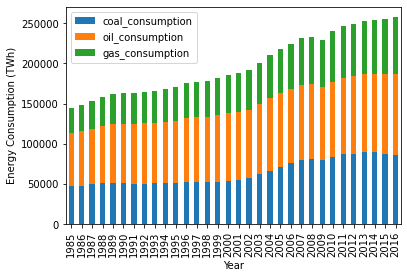

In [6]:
#get a plot of global unclean energy use 
unclean = ['country', 'year',
           'coal_consumption', 'oil_consumption', 'gas_consumption']
unclean_energy = ['coal_consumption', 'oil_consumption', 'gas_consumption']
global_unclean = data[unclean]
global_unclean = global_unclean.groupby(["year"])[unclean_energy].sum()
global_unclean.plot(kind = 'bar', stacked = True, ylabel = "Energy Consumption (TWh)", xlabel = 'Year')
plt.savefig('global_fossil_fuels.svg')

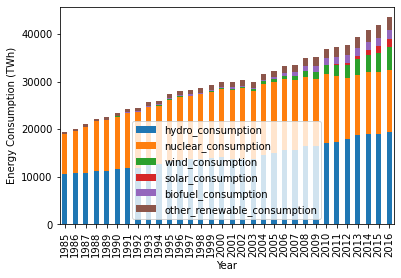

In [7]:
#get a plot of global clean energy use
clean_energy = ['hydro_consumption', 'nuclear_consumption',
                 'wind_consumption','solar_consumption',
               'biofuel_consumption', 'other_renewable_consumption']                
clean = ['country', 'year'] + clean_energy

global_clean = data[clean]
global_clean = global_clean.groupby(["year"])[clean_energy].sum()
global_clean.plot(kind = 'bar', stacked = True, ylabel = "Energy Consumption (TWh)", xlabel = 'Year')
plt.savefig('global_clean_energy.svg')

In [8]:
#get the countries with the most fossil fuel use
fossil_fuel_sum = data.groupby(['country'])['fossil_fuel_consumption'].sum().reset_index()
continents = ['North America', 'South & Central America', 'Europe', 'Africa', 'Asia', 'World','Oceanea', 
                'Asia Pacific', 'Middle East']
fossil_fuel_sum = fossil_fuel_sum[~fossil_fuel_sum['country'].isin(continents)]
fossil_fuel_sum = fossil_fuel_sum.dropna()
f = fossil_fuel_sum['fossil_fuel_consumption']


top_10 = np.argsort(f)[-10:]
top_countries = []
for i in top_10:
    top_countries.append(fossil_fuel_sum.iloc[i]['country'])

top_countries

['Italy',
 'South Korea',
 'Canada',
 'United Kingdom',
 'Germany',
 'India',
 'Japan',
 'Russia',
 'China',
 'United States']

In [9]:
refined_data = data[data['country'].isin(top_countries)]

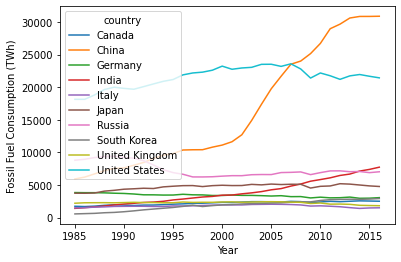

In [10]:
top_fossils = refined_data.groupby(['year','country'])['fossil_fuel_consumption'].sum().unstack('country')
top_fossils.plot(ylabel = "Fossil Fuel Consumption (TWh)", xlabel = 'Year')
plt.savefig('top_fossils.svg')

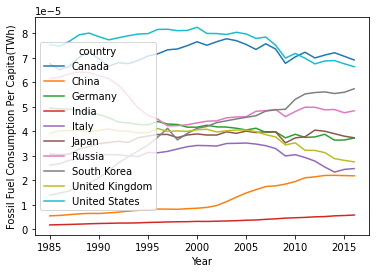

In [11]:
top_fossils_per_capita = refined_data.groupby(['year','country'])['fossil_fuel_per_capita'].sum().unstack('country')
top_fossils_per_capita.plot(ylabel = "Fossil Fuel Consumption Per Capita(TWh)", xlabel = 'Year')
plt.savefig('top_fossils_per_capita.svg')

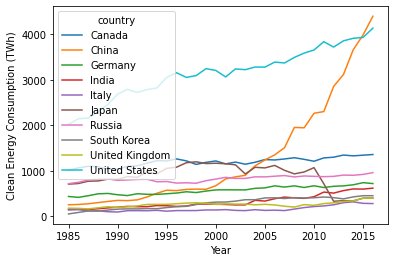

In [12]:
top_clean = refined_data.groupby(['year','country'])['clean_energy_consumption'].sum().unstack('country')
top_clean.plot(ylabel = "Clean Energy Consumption (TWh)", xlabel = 'Year')
plt.savefig('top_fossils_clean.svg')

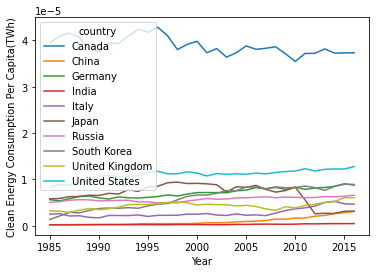

In [13]:
top_clean_per_capita = refined_data.groupby(['year','country'])['clean_energy_per_capita'].sum().unstack('country')
top_clean_per_capita.plot(ylabel = "Clean Energy Consumption Per Capita(TWh)", xlabel = 'Year')
plt.savefig('top_fossils_clean_per_capita.svg')

<AxesSubplot:xlabel='Year', ylabel='Percent Clean Energy Consumption (TWh)'>

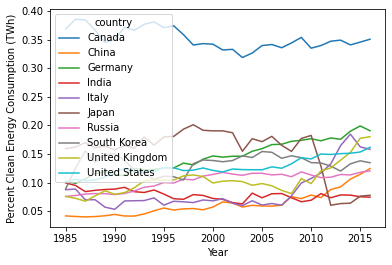

In [14]:
top_clean_pct = refined_data.groupby(['year','country'])['clean_energy_pct'].sum().unstack('country')
top_clean_pct.plot(ylabel = "Percent Clean Energy Consumption (TWh)", xlabel = 'Year')

<AxesSubplot:xlabel='Year', ylabel='Percent Fossil Fuel Consumption (TWh)'>

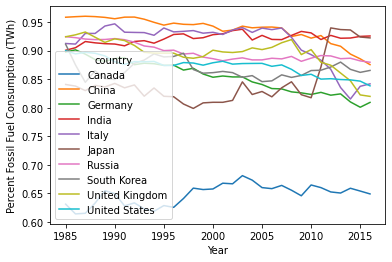

In [15]:
top_fossil_pct = refined_data.groupby(['year','country'])['fossil_fuel_pct'].sum().unstack('country')
top_fossil_pct.plot(ylabel = "Percent Fossil Fuel Consumption (TWh)", xlabel = 'Year')

<AxesSubplot:xlabel='Year', ylabel='Population'>

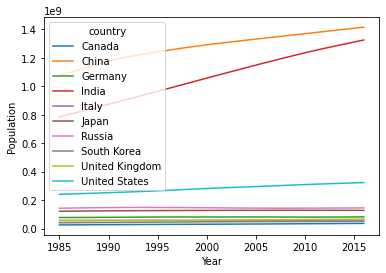

In [16]:
population = refined_data.groupby(['year','country'])['population'].sum().unstack('country')
population.plot(ylabel = "Population", xlabel = 'Year')

<AxesSubplot:xlabel='Year', ylabel='GDP per Capita'>

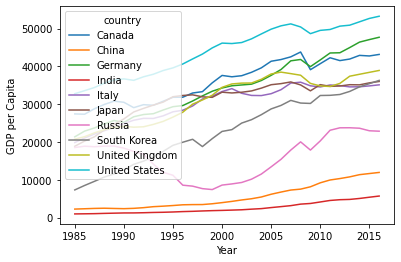

In [17]:
gdp_per_capita = refined_data.groupby(['year','country'])['gdp_per_capita'].sum().unstack('country')
gdp_per_capita.plot(ylabel = "GDP per Capita", xlabel = 'Year')

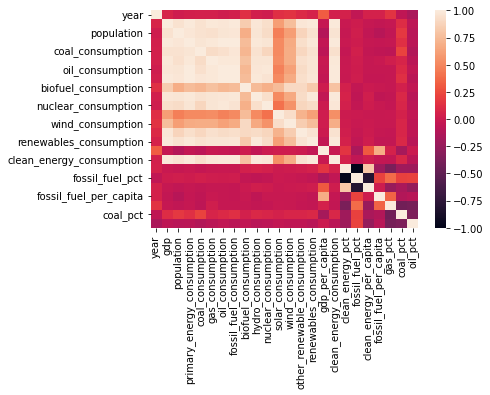

In [19]:
heat_map = sns.heatmap(data.corr(), annot = False)

In [20]:
refined_data['clean_energy_pct'].corr(refined_data['gdp_per_capita'])

0.47171374078155087

In [21]:
#calculate correlation between gdp per capita and clean energy used percent
cor_list = []
for country in top_countries:
    a = refined_data[refined_data['country'] == country]
    cor_list.append((country, a['gdp_per_capita'].corr(a['clean_energy_pct'])))
    
cor_list



[('Italy', 0.4171796976486442),
 ('South Korea', 0.26530639978558046),
 ('Canada', -0.7353249310967158),
 ('United Kingdom', 0.5862299876740068),
 ('Germany', 0.9895099562071041),
 ('India', -0.4445685297548233),
 ('Japan', -0.2510580226736179),
 ('Russia', -0.10672285982647141),
 ('China', 0.9368276726664746),
 ('United States', 0.8096740369497738)]

<AxesSubplot:xlabel='gdp_per_capita', ylabel='clean_energy_per_capita'>

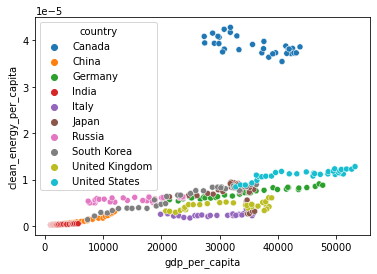

In [22]:
sns.scatterplot(data = refined_data, x = 'gdp_per_capita',
                  y = 'clean_energy_per_capita', hue = 'country')


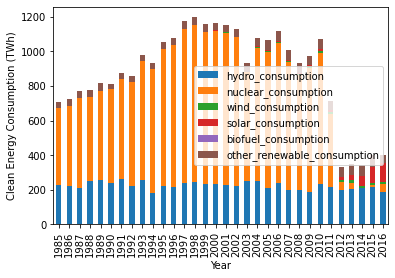

In [23]:
japan = refined_data[refined_data['country'] == 'Japan']
japan[clean].plot(kind = 'bar', x = 'year', stacked = True, xlabel = 'Year', ylabel = "Clean Energy Consumption (TWh)")
plt.savefig('japan_clean.svg')

In [43]:
unclean_pct = ['country', 'year',
           'coal_pct', 'oil_pct', 'gas_pct', 'clean_energy_pct']

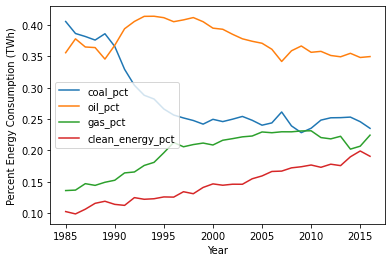

In [45]:
germany = refined_data[refined_data['country'] == 'Germany']
germany[unclean_pct].plot(kind = 'line', x = 'year', stacked = False, xlabel = 'Year', ylabel = "Percent Energy Consumption (TWh)")
plt.savefig('germany_fossils.svg')